In [1]:
import pandas as pd

train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

print(train.head())
print(test.head())
print(submission.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


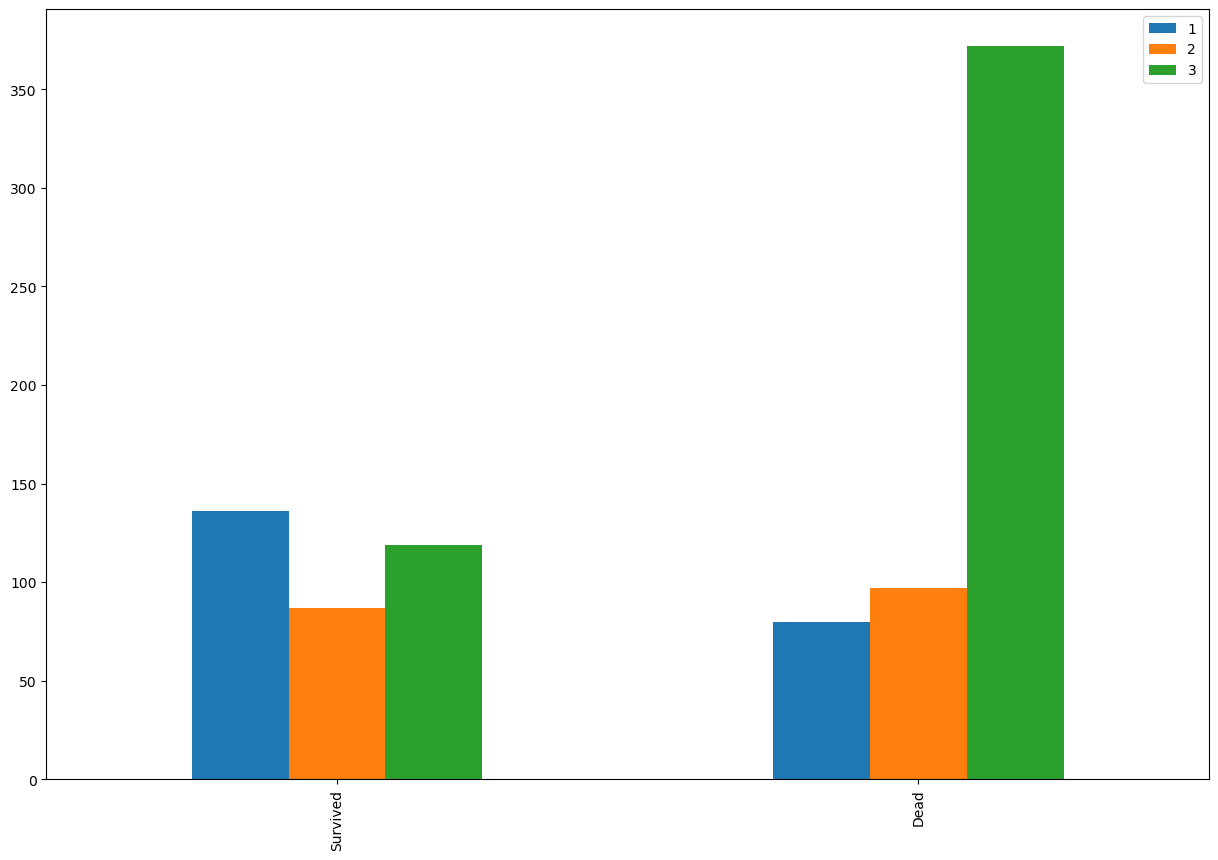

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def bar_chart(feature):
  survived = train.loc[train["Survived"]==1,feature].value_counts()  #해당 특징의 Survived 가 1인 갯수를 세어준다.
  dead = train.loc[train["Survived"]==0,feature].value_counts()
  data = pd.DataFrame([survived,dead],index = ["Survived","Dead"])
  data.plot(kind="bar",figsize=(15,10))
  plt.show()

#pclass에 따른 생존/사망자 확인
bar_chart("Pclass")

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


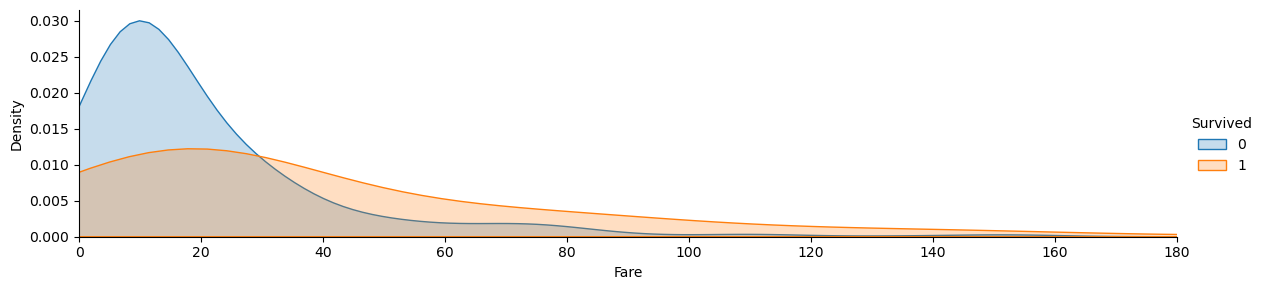

In [4]:
#fare 에 따른 생존/사망자 확인
facet = sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()
plt.xlim(0,180)
plt.show()

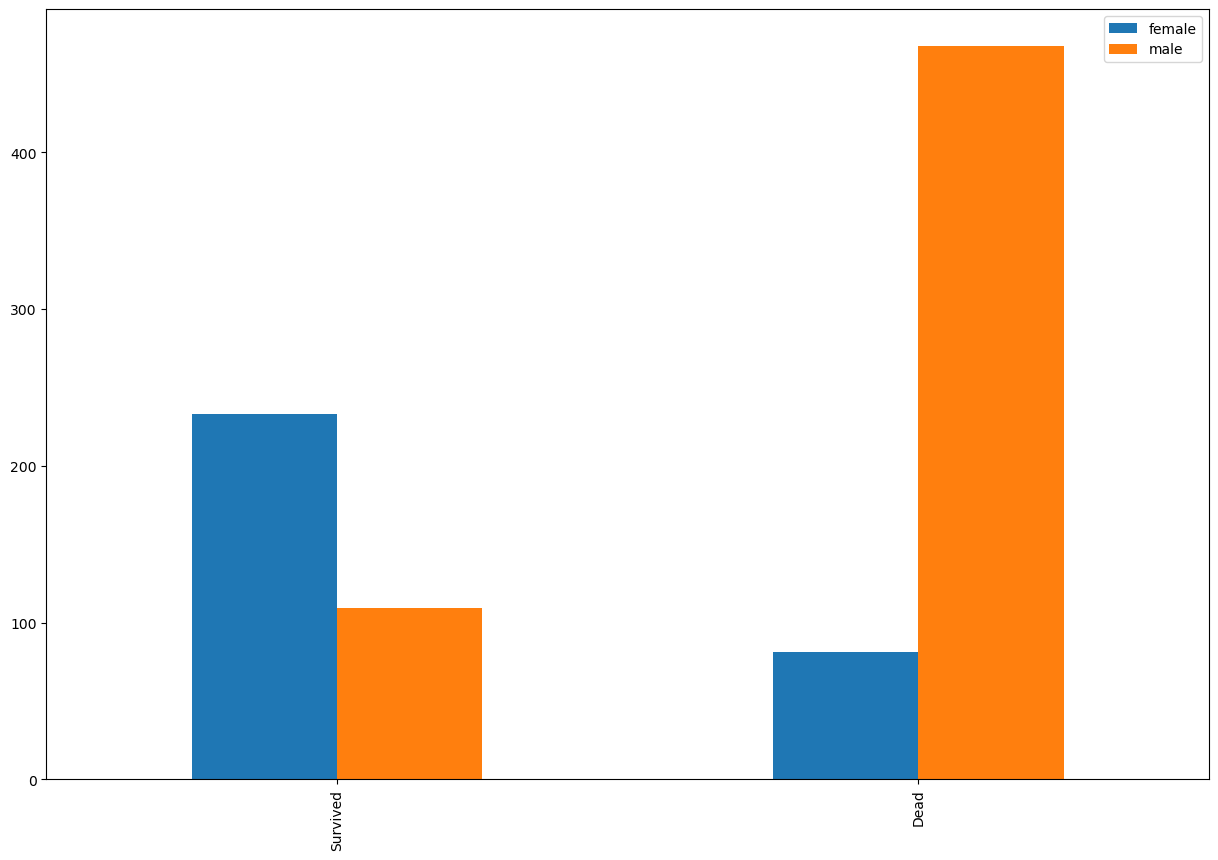

In [5]:
#sex 에 따른 생존/사망자 확인
bar_chart('Sex')

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


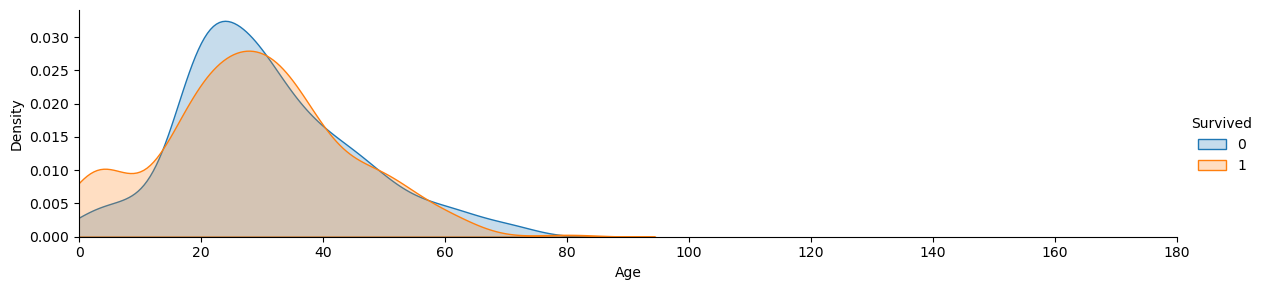

In [6]:
#age 에 따른 생존/사망자 확인
facet = sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.xlim(0,180)
plt.show()

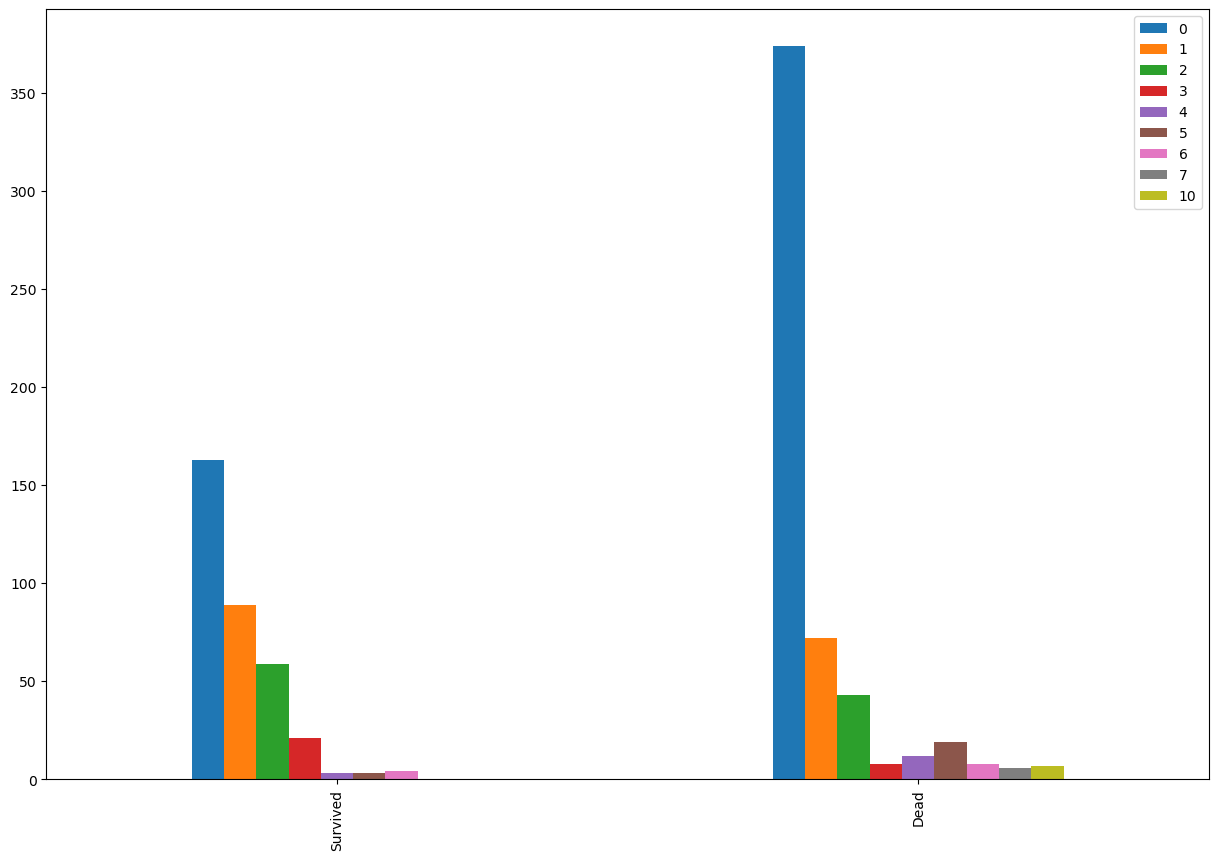

In [7]:
train['Familysize']=train['SibSp'] + train['Parch']
#train.drop('SibSp',axis=1,inplace=True)
#train.drop('Parch',axis=1,inplace=True)

bar_chart('Familysize')

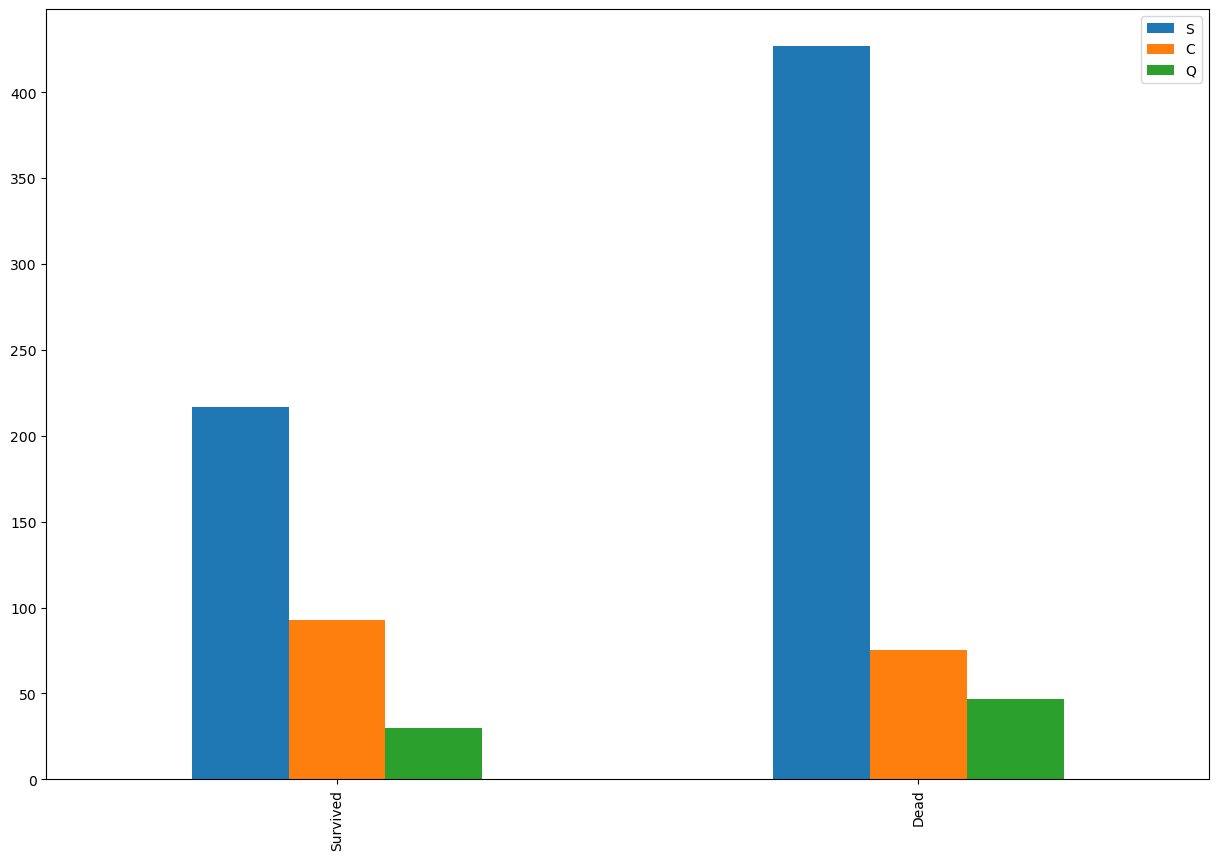

In [8]:
#embarked 에 따른 생존/사망자
bar_chart('Embarked')

In [9]:
#age 결측치 처리
#평균으로 결측치 채우기
train['Age'].fillna(train['Age'].mean(axis=0),inplace=True)

In [10]:
# age 구간화
# 청소년 : 0
# 청년 : 1
# 장년 : 2
# 중년 : 3
# 노년 : 4
ranges=[0,16,26,36,62,100]
labels=[0,1,2,3,4]
train["AgeGroup"]=pd.cut(train['Age'],ranges,right=False,labels=labels)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familysize,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,2


In [11]:
# fare 구간화

ranges=[0,17,30,100,1000]
labels=[0,1,2,3]
train["FareGroup"]=pd.cut(train['Fare'],ranges,right=False,labels=labels)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familysize,AgeGroup,FareGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,3,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,2,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,2,0


In [12]:
#성별을 숫자로 매핑
train['SexNum']=train['Sex'].apply(lambda x:1 if (x=='female') else 0)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familysize,AgeGroup,FareGroup,SexNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,1,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1,3,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1,2,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,0,2,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,0,1,2,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,3,2,1,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,0,2,2,0


In [13]:
#embarked을 숫자로 매핑
train['EmbarkedNum']=train['Embarked'].apply(lambda x:0 if (x=='S') else (1 if(x=='C') else 2))
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familysize,AgeGroup,FareGroup,SexNum,EmbarkedNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,1,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1,3,2,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1,2,2,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,0,2,0,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,0,1,2,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,3,2,1,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,0,2,2,0,1


In [14]:
target = train['Survived']
data = train[['Pclass','SexNum','AgeGroup','FareGroup','EmbarkedNum','Familysize']]

In [15]:
from sklearn.model_selection import train_test_split
#훈련세트와 테스트 세트 분리
train_input,test_input,train_target,test_target = train_test_split(data,target,test_size=0.2,random_state=42)

#어떤 알고리즘이 가장 성능이 좋은지 테스트 해 보자.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import numpy as np

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#K_fold cross validation 준비, 10개 구역을 나눔.
k_fold = KFold(n_splits=10,shuffle=True,random_state=42)

#KNN
knn = KNeighborsClassifier(n_neighbors=5)
score_knn = cross_val_score(knn,train_input,train_target,cv=k_fold,n_jobs=1,scoring='accuracy')

#의사결정 트리
dt = DecisionTreeClassifier()
score_dt = cross_val_score(dt,train_input,train_target,cv=k_fold,n_jobs=1,scoring='accuracy')

#랜덤 포레스트
rf = RandomForestClassifier(n_estimators=10)
score_rf = cross_val_score(rf,train_input,train_target,cv=k_fold,n_jobs=1,scoring='accuracy')

#SVM
sv = svm.SVC(gamma='auto')
score_sv = cross_val_score(sv,train_input,train_target,cv=k_fold,n_jobs=1,scoring='accuracy')

#정확도 확인
print("KNN   :",round(np.mean(score_knn)*100,2))
print("DecisionTree :",round(np.mean(score_dt)*100,2))
print("RandomForest :",round(np.mean(score_rf)*100,2))
print("SVM   :",round(np.mean(score_sv)*100,2))

KNN   : 76.83
DecisionTree : 78.65
RandomForest : 78.94
SVM   : 82.44


In [16]:
#SVM으로 모델을 훈련하자
sv.fit(data,target)

SVC(gamma='auto')

In [17]:
#test 데이터도 train과 동일하게 데이터가공
test['Familysize']=test['SibSp'] + test['Parch']
#age 결측치 처리
#평균으로 결측치 채우기
test['Age'].fillna(test['Age'].mean(axis=0),inplace=True)

# age 구간화
# 청소년 : 0
# 청년 : 1
# 장년 : 2
# 중년 : 3
# 노년 : 4
ranges=[0,16,26,36,62,100]
labels=[0,1,2,3,4]
test["AgeGroup"]=pd.cut(test['Age'],ranges,right=False,labels=labels)
                        
# fare 구간화
ranges=[0,17,30,100,1000]
labels=[0,1,2,3]
test["FareGroup"]=pd.cut(test['Fare'],ranges,right=False,labels=labels)

#성별을 숫자로 매핑
test['SexNum']=test['Sex'].apply(lambda x:1 if (x=='female') else 0)
                        
#embarked을 숫자로 매핑
test['EmbarkedNum']=test['Embarked'].apply(lambda x:0 if (x=='S') else (1 if(x=='C') else 2))
                        
test_data = test[['Pclass','SexNum','AgeGroup','FareGroup','EmbarkedNum','Familysize']]
print(test_data)

     Pclass  SexNum AgeGroup FareGroup  EmbarkedNum  Familysize
0         3       0        2         0            2           0
1         3       1        3         0            0           1
2         2       0        4         0            2           0
3         3       0        2         0            0           0
4         3       1        1         0            0           2
..      ...     ...      ...       ...          ...         ...
413       3       0        2         0            0           0
414       1       1        3         3            1           0
415       3       0        3         0            0           0
416       3       0        2         0            0           0
417       3       0        2         1            1           2

[418 rows x 6 columns]


In [18]:
pred = sv.predict(test_data)

In [19]:
submission = pd.DataFrame({
"PassengerId":test['PassengerId'],
"Survived": pred
})
  
submission.to_csv('submission.csv',index=False)

In [20]:
submissionfile = pd.read_csv('/kaggle/working/submission.csv')

print(submissionfile.head())

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1
